#Python imports

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#datasource

In [23]:
# Load the data from the CSV file into a numpy array
data = pd.read_csv('raw_house_data.csv', header=None)

##Column names

In [24]:
# Rename the columns of the dataframe
data.columns = ['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres', 'taxes', 
                'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage', 'kitchen_features', 
                'fireplaces', 'floor_covering', 'HOA']

In [25]:
# Print the shape of the data array to verify that it loaded correctly
print("Data shape:", data.shape)

Data shape: (5001, 16)


The Data_Shape: (5001, 16) output says that the data has a shape of 5001 rows and 16 columns.

What this means in we have 5001 data points and for 1 data point we have 16 features.

#The steps to preprocessing the data

Now the data is loaded in and we understand it's shape, it is time to understand preprocessing. Preprocessing a dataset refers to techniques and methods. The steps are:
- Cleaning the data
- handling missing values
- transforming data for increased suitability for modelling
- and either scaling or normalizing the data.

#Cleaning the data

we use the dropna() method to remove any rows with null values. The resulting DataFrame with null values removed is stored in data_clean. We use the drop_duplicates() method to get rid of any duplicate rows from the dataframe I stuck them together because I didn't want to unneccesarily have a different variable for clean and dropdupes.

In [26]:
# Remove rows with any null values and drop duplicates
data_clean = data.dropna().drop_duplicates()

# Print the shape of the cleaned data
print("Cleaned Data shape:", data_clean.shape)

Cleaned Data shape: (4974, 16)


Find out what the different types of data are:

It seems like all columns in the DataFrame are of object (string) type. This means that the data may not be properly typed, and you may need to convert some columns to appropriate types e.g. converting sold_price to a numeric type like float or int.

In [27]:
print(data_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4974 entries, 0 to 5000
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   MLS               4974 non-null   object
 1   sold_price        4974 non-null   object
 2   zipcode           4974 non-null   object
 3   longitude         4974 non-null   object
 4   latitude          4974 non-null   object
 5   lot_acres         4974 non-null   object
 6   taxes             4974 non-null   object
 7   year_built        4974 non-null   object
 8   bedrooms          4974 non-null   object
 9   bathrooms         4974 non-null   object
 10  sqrt_ft           4974 non-null   object
 11  garage            4974 non-null   object
 12  kitchen_features  4974 non-null   object
 13  fireplaces        4974 non-null   object
 14  floor_covering    4974 non-null   object
 15  HOA               4974 non-null   object
dtypes: object(16)
memory usage: 660.6+ KB
None


In [28]:
print(data_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4974 entries, 0 to 5000
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   MLS               4974 non-null   object
 1   sold_price        4974 non-null   object
 2   zipcode           4974 non-null   object
 3   longitude         4974 non-null   object
 4   latitude          4974 non-null   object
 5   lot_acres         4974 non-null   object
 6   taxes             4974 non-null   object
 7   year_built        4974 non-null   object
 8   bedrooms          4974 non-null   object
 9   bathrooms         4974 non-null   object
 10  sqrt_ft           4974 non-null   object
 11  garage            4974 non-null   object
 12  kitchen_features  4974 non-null   object
 13  fireplaces        4974 non-null   object
 14  floor_covering    4974 non-null   object
 15  HOA               4974 non-null   object
dtypes: object(16)
memory usage: 660.6+ KB
None


This will iterate over the numeric_columns list using a while loop and convert each column to a numeric data type using the pd.to_numeric().

In [29]:
# Specify the columns that need to be converted to integer data types
int_columns = ['year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage', 'lot_acres', 'fireplaces', 'zipcode']

# Specify the columns that need to be converted to float data types
float_columns = ['sold_price', 'taxes']

# Convert the columns to integer data types
i = 0
j = 0
while i < len(int_columns):
    column = int_columns[i]
    data_clean[column] = pd.to_numeric(data_clean[column], errors='coerce').fillna(0).astype(int)
    i += 1

while j < len(float_columns):
  column1 = float_columns[j]
  data_clean[column1] = pd.to_numeric(data_clean[column1], errors='coerce').fillna(0).astype(float)
  j += 1

This loop iterates over the columns of the DataFrame using the len(data_clean.columns) method. For each column, it checks if the column type is either np.float64 or np.int64, which represents numeric columns. If the column is numeric, it drops any rows with null/NaN values in that column using the dropna() method with the subset argument set to the current column name. Finally, the loop increments the index i by 1 to move to the next column.

In [30]:
i = 0
while i < len(data_clean.columns):
    col = data_clean.columns[i]
    if data_clean[col].dtype in [np.float64, np.int64]:
        data_clean = data_clean.dropna(subset=[col])
    i += 1

print(data_clean)

           MLS  sold_price  zipcode    longitude   latitude  lot_acres  \
0          MLS         0.0        0    longitude   latitude          0   
1     21530491   5300000.0    85637    -110.3782  31.356362       2154   
2     21529082   4200000.0    85646  -111.045371  31.594213       1707   
3      3054672   4200000.0    85646  -111.040707  31.594844       1707   
4     21919321   4500000.0    85646  -111.035925  31.645878        636   
...        ...         ...      ...          ...        ...        ...   
4996  21810382    495000.0    85641  -110.661829  31.907917          4   
4997  21908591    550000.0    85750  -110.858556  32.316373          1   
4998  21832452    475000.0    85192  -110.755428  32.964708         12   
4999  21900515    550000.0    85745  -111.055528  32.296871          1   
5000   4111490    450000.0    85621  -110.913054  31.385259          4   

         taxes  year_built  bedrooms  bathrooms  sqrt_ft  garage  \
0         0.00           0         0       

Check to see if files have changed type

In [31]:
print(data_clean)

           MLS  sold_price  zipcode    longitude   latitude  lot_acres  \
0          MLS         0.0        0    longitude   latitude          0   
1     21530491   5300000.0    85637    -110.3782  31.356362       2154   
2     21529082   4200000.0    85646  -111.045371  31.594213       1707   
3      3054672   4200000.0    85646  -111.040707  31.594844       1707   
4     21919321   4500000.0    85646  -111.035925  31.645878        636   
...        ...         ...      ...          ...        ...        ...   
4996  21810382    495000.0    85641  -110.661829  31.907917          4   
4997  21908591    550000.0    85750  -110.858556  32.316373          1   
4998  21832452    475000.0    85192  -110.755428  32.964708         12   
4999  21900515    550000.0    85745  -111.055528  32.296871          1   
5000   4111490    450000.0    85621  -110.913054  31.385259          4   

         taxes  year_built  bedrooms  bathrooms  sqrt_ft  garage  \
0         0.00           0         0       

In [32]:
print(data_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4974 entries, 0 to 5000
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               4974 non-null   object 
 1   sold_price        4974 non-null   float64
 2   zipcode           4974 non-null   int64  
 3   longitude         4974 non-null   object 
 4   latitude          4974 non-null   object 
 5   lot_acres         4974 non-null   int64  
 6   taxes             4974 non-null   float64
 7   year_built        4974 non-null   int64  
 8   bedrooms          4974 non-null   int64  
 9   bathrooms         4974 non-null   int64  
 10  sqrt_ft           4974 non-null   int64  
 11  garage            4974 non-null   int64  
 12  kitchen_features  4974 non-null   object 
 13  fireplaces        4974 non-null   int64  
 14  floor_covering    4974 non-null   object 
 15  HOA               4974 non-null   object 
dtypes: float64(2), int64(8), object(6)
memory 

In [33]:
# Calculate the z-score for the sold_price column
data_clean['z_score'] = (data_clean['sold_price'] - data_clean['sold_price'].mean()) / data_clean['sold_price'].std()

# Remove rows with a z-score greater than 3 or less than -3
data_clean = data_clean[(data_clean['z_score'] < 3) & (data_clean['z_score'] > -3)]

# Remove the z-score column
data_clean.drop('z_score', axis=1, inplace=True)


#visualization

### Plot longitude and latitude





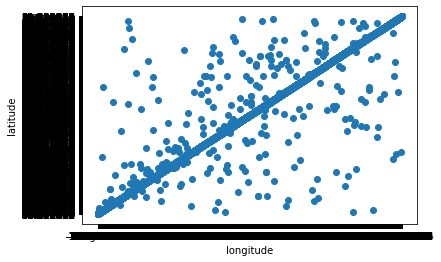

In [34]:
# Create a scatter plot of the longitude and latitude columns
plt.scatter(data_clean['longitude'], data_clean['latitude'])
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

### Plot Sold Price



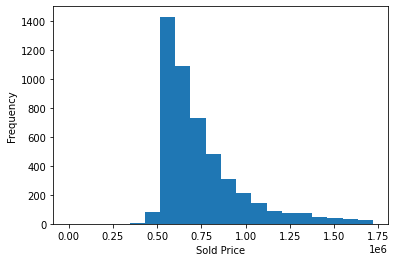

In [35]:
# Create a histogram of the sold_price column
plt.hist(data_clean['sold_price'], bins=20)
plt.xlabel('Sold Price')
plt.ylabel('Frequency')
plt.show()

In [37]:
print(data_clean['zipcode'].isnull().sum())
print(data_clean[data_clean['zipcode'].isnull()])

0
Empty DataFrame
Columns: [MLS, sold_price, zipcode, longitude, latitude, lot_acres, taxes, year_built, bedrooms, bathrooms, sqrt_ft, garage, kitchen_features, fireplaces, floor_covering, HOA]
Index: []


# This was just fun!
## So I began by thinking what a real use case for housing information would be. The most obvious to me is postcode tax. I.e people I know who run businesses in construction charge more to people in classier zipcodes.
### I searched for a way to map out zipcodes so you could visualise places sold, It shouldn't be too hard for a data modeller to filter that map and tweak it.

In [38]:
zipcode_means = []  # create an empty list to store the mean values for each zipcode

zipcode = data_clean.zipcode.unique().tolist()  # get the unique zipcodes in the 'zipcode' column of the dataframe, convert them to a list, and store them in 'zipcode'
i = 0  # initialize a counter variable

while i < len(zipcode):  # start a while loop that will iterate over each unique zipcode
    sold_price = pd.to_numeric(data_clean[data_clean['zipcode'] == zipcode[i]]['sold_price'], errors='coerce')  # extract the sold_price values for the current zipcode, convert them to numeric format, and store them in 'sold_price'
    if sold_price.isna().sum() == len(sold_price):  # if all of the sold_price values are NaN, skip this zipcode and move to the next one
        i += 1
        continue
    val = pd.to_numeric(data_clean[data_clean['zipcode'] == zipcode[i]]['sold_price'], errors='coerce').mean()  # calculate the mean of the sold_price values for the current zipcode, convert them to numeric format, and store the mean in 'val'
    lat_str = data_clean[data_clean['zipcode'] == zipcode[i]]['latitude']  # extract the latitude values for the current zipcode and store them as a string in 'lat_str'
    lat_numeric = pd.to_numeric(lat_str.str.split().str.join('.'), errors='coerce')  # convert the latitude values to numeric format, replacing any spaces with periods and handling any errors with 'coerce', and store the result in 'lat_numeric'
    lat = lat_numeric.mean()  # calculate the mean of the latitude values for the current zipcode and store the result in 'lat'

    long_str = data_clean[data_clean['zipcode'] == zipcode[i]]['longitude']  # extract the longitude values for the current zipcode and store them as a string in 'long_str'
    long_numeric = pd.to_numeric(long_str.str.split().str.join('.'), errors='coerce')  # convert the longitude values to numeric format, replacing any spaces with periods and handling any errors with 'coerce', and store the result in 'long_numeric'
    long = long_numeric.mean()  # calculate the mean of the longitude values for the current zipcode and store the result in 'long'

    zipcode_means.append([zipcode[i], val, lat, long])  # add a list containing the current zipcode, the mean sold_price, the mean latitude, and the mean longitude to 'zipcode_means'
    i += 1  # increment the counter variable
    
xall = []  # create an empty list to store the zipcodes
yall = []  # create an empty list to store the mean sold_prices
latall = []  # create an empty list to store the mean latitudes
longall = []  # create an empty list to store the mean longitudes
for val in zipcode_means:  # start a loop that will iterate over each list in 'zipcode_means'
    xall.append(val[0])  # append the current zipcode to 'xall'
    yall.append(val[1])  # append the current mean sold_price to 'yall'
    latall.append(val[2])  # append the current mean latitude to 'latall'
    longall.append(val[3])  # append the current mean longitude to 'longall'
    
data_clean = pd.DataFrame(list(zip(xall, yall, latall, longall)), columns = ['zipcode', 'Price', 'latitude', 'longitude'])  # create a new dataframe called 'data_clean' that contains the four lists as columns,


In [39]:
import folium

# Get the latitude and longitude of the first zipcode in the dataframe
latitude = data_clean['latitude'][1]
longitude = data_clean['longitude'][1]

# Remove any rows with NaN values in latitude or longitude
zipcode_means = [val for val in zipcode_means if not any(np.isnan(val[2:4]))]

# Create the map with the starting location and zoom level
map = folium.Map(location=[latitude, longitude], zoom_start=15)

# Add markers for each zipcode and its corresponding price and location
for val in zipcode_means:
    folium.Marker(location=[val[2], val[3]], tooltip='zipcode: {}<br>Price: ${}'.format(val[0], round(val[1], 2))).add_to(map)

# Display the map
map
